# 텍스트 마이닝 (Text Mining)   

텍스트 분석을 위한 패키지 
  * NLTK(Natural Language Toolkit for Python): 아나콘다에 기본적으로 함께 설치되는 자연어 처리 패키지 
  * SpaCy: 속도와 성능이 우수함 
  * Gensim: 토픽 모델링이 강점
  * KoNLPy(Korean Natural Language Processing in Python) 등
  
텍스트 분석 프로세스
* 텍스트 전처리 
  * 데이터 클린징(특수 문자 삭제 등), 토큰화 (tokenization), 불용어 (stopword) 제거, 대소문자 변경, 어간 추출 (stemming), 표제어 추출 (lemmatization) 등
     
* 텍스트 수치화 (Vectorizaiotn)   
  * Bag of Words: 빈도 (Word Count) 또는 단어빈도-역문서빈도 (TF-IDF,  Term Frequency-Inverse Document Frequency) 기반 벡터화 
  * Word2Vec (Word Embedding to Vector): 단어의 유사성을 기반으로 한 벡터화    
* 모델 수립 및 학습/예측/평가 


텍스트 수집 및 관련 분석  
* 텍스트 크롤링 (Crawling)   
* 워드클라우드(Word Cloud) 시각화
* 감성 분석 (sentiment analysis), 토픽 모델링 (topic modeling)
* 문서 군집화, 연관어 분석 등  


*본 실습은 파이썬 머신러닝 완벽 가이드(권철민, 위키북스, 2020), 파이썬 라이브러리를 활용한 머신러닝 (A.Mueller & S.Guido, 박해선 역, 한빛미디어, 2019) 교재 참고


In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

### 영문 텍스트 전처리 

#### 텍스트 클린징
re 모듈을 통해 정규 표현식(특정한 규칙을 가진 문자열의 집합을 표현하는 형식)을 사용함으로써 숫자, 문장부호, 특수 문자 등 제거할 수 있다. 


In [13]:
import re  
# 정규표현식(regular expression)  

text_sample = '@@@@12345%%%%%The Matrix is everywhere its all around us, here even in this room. \
You can see it out your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes.'

# 스페이스, 마침표, 영문 대소문자 제외
p = re.compile("[^ .a-zA-Z]+")
text_sample = p.sub("", text_sample)

# 숫자 제외
p = re.compile("[0-9]+")
text_sample = p.sub("", text_sample)

print(text_sample)

The Matrix is everywhere its all around us here even in this room. You can see it out your window or on your television. You feel it when you go to work or go to church or pay your taxes.


#### 텍스트 토큰화 (tokenization)



In [14]:
import nltk

# nltk.download('all') 
# Punket Tokenizer Models (마침표, 개행 문자 등 단어 사전)을 다운로드 받음
nltk.download('punkt') 

# 문장 토큰화
sentences = nltk.sent_tokenize(text=text_sample) # 3개의 문장으로 이루어진 list를 반환 
print(type(sentences),len(sentences))
print(sentences)

# 단어 토큰화
words = nltk.word_tokenize(text=text_sample)
print(type(words),len(words))
print(words)

# 품사 분석
# nltk.download('averaged_perceptron_tagger')
# tag = nltk.pos_tag(words)
# print(tag)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<class 'list'> 3
['The Matrix is everywhere its all around us here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work or go to church or pay your taxes.']
<class 'list'> 43
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', 'here', 'even', 'in', 'this', 'room', '.', 'You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.', 'You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']


In [15]:
#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text): 
    # 문장별로 분리 토큰
    sentences = nltk.sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


#### 불용어 (stopword) 제거, 대소문자 변경
 


In [16]:
nltk.download('stopwords')

print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])  #179개 중 20개만 출력

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [17]:
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환
        word = word.lower()  # 대문자: upper()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', 'go', 'church', 'pay', 'taxes', '.']]


#### 어간 추출 (stemming), 표제어 추출 (lemmatization)

* 어간 추출:  PorterStemmer, LancasterStemmer, Snowball Stemmer 등 이용 
* 표제어 추출: WordNetLemmatizer 등 이용 
  * 표제어(lemma, 단어의 원형)를 찾을 때 단어의 품사를 지정하여 찾기 때문에 어간 추출보다 정교하다. 
  * 품사(pos: part of speech) 옵션을 명사(n, 기본 옵션), 동사(v), 형용사(a), 부사(r) 등으로 지정할 수 있다. 
  * WordNetLemmatizer를 사용하려면 WordNet이 계산한 형태소를 참조해 문장에서 단어나 표현을 인식하므로 인터넷에 연결되어 있어야 한다. 

In [18]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

print("PorterStemmer 결과:")
print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

PorterStemmer 결과:
work work work
amus amus amus
happier happiest
fancier fanciest


In [19]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print("LancasterStemmer 결과:")
print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

LancasterStemmer 결과:
work work work
amus amus amus
happy happiest
fant fanciest


In [20]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemma = WordNetLemmatizer()
print("WordNetLemmatizer 결과:")
print(lemma.lemmatize('working','v'),lemma.lemmatize('works','v'),lemma.lemmatize('worked','v'))
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
WordNetLemmatizer 결과:
work work work
amuse amuse amuse
happy happy
fancy fancy


#### 단어 빈도 분석 및 워드클라우드 시각화

In [21]:
# 단어 빈도 분석
from collections import Counter 

words = nltk.word_tokenize(text=text_sample)
print(words)

vocab = Counter(words)
print(vocab)

['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', 'here', 'even', 'in', 'this', 'room', '.', 'You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.', 'You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']
Counter({'.': 3, 'your': 3, 'or': 3, 'You': 2, 'it': 2, 'go': 2, 'to': 2, 'The': 1, 'Matrix': 1, 'is': 1, 'everywhere': 1, 'its': 1, 'all': 1, 'around': 1, 'us': 1, 'here': 1, 'even': 1, 'in': 1, 'this': 1, 'room': 1, 'can': 1, 'see': 1, 'out': 1, 'window': 1, 'on': 1, 'television': 1, 'feel': 1, 'when': 1, 'you': 1, 'work': 1, 'church': 1, 'pay': 1, 'taxes': 1})


your : 3
or : 3
You : 2
it : 2


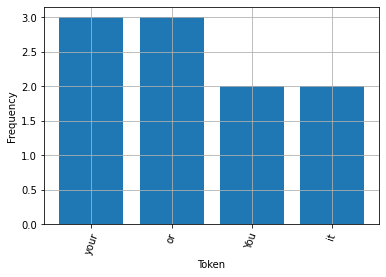

In [22]:
# 단어 빈도수 시각화를 위한 기반 작업
wordInfo = dict()

for tags, counts in vocab.most_common(5):
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts
        print ("%s : %d" % (tags, counts))

plt.xlabel('Token')
plt.ylabel('Frequency')
plt.grid(True)
    
Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

plt.show()

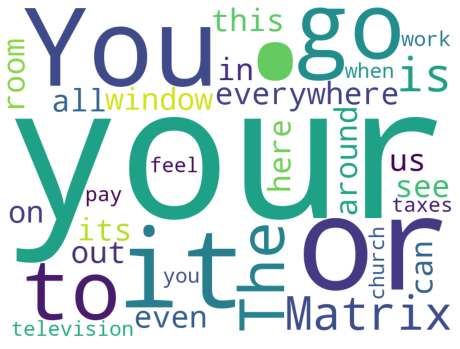

In [23]:
# 워드클라우드 시각화
from wordcloud import WordCloud

wc = WordCloud(width=800, height=600, background_color = "white")
wc = wc.generate_from_frequencies(vocab)
fig = plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

## 텍스트 수치화 (Vectorizaiotn)   
  

### Bag of Words: 단어 빈도수 기반

In [24]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

# 텍스트를 BOW로 표현하기 - 단어의 빈도수 기반
from sklearn.feature_extraction.text import CountVectorizer  
vect = CountVectorizer()  
print(vect)
# 기본 파라미터: ngram_range =(1,1) 토큰 하나(monogram)를 단어로 사용, lowercase = True 모든 단어를 소문자로 변경
# tokenizer=nltk.word_tokenize nltk 형태소 분석을 사용 가능 


# 문서별 단어를 정수로 매핑하고, 단어의 빈도 수를 희소행렬(sparse martrix)로 변환
# fit: 텍스트를 토큰으로 나누고 어휘 사전 구축 
# transform: 단어의 빈도수를 희소 행렬(Sparse Matrix)의 CSR (Compressed Sparse Row) 형식으로 저장
bag_of_words = vect.fit_transform(bards_words)
 
print(repr(bag_of_words))
print(bag_of_words)

# CSR 형식은 COO(COOrdinate) 형식과는 다르게 행 압축 정보 이용
# [최초 시작 행번호, 시작 행에서의 데이터 누적 개수, 두번째 행에서의 데이터 누적 개수,..., 마지막 행에서의 데이터 누적개수]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>
  (0, 9)	1
  (0, 3)	1
  (0, 2)	1
  (0, 10)	1
  (0, 4)	1
  (0, 6)	1
  (0, 12)	1
  (1, 9)	1
  (1, 3)	1
  (1, 12)	1
  (1, 1)	1
  (1, 8)	1
  (1, 7)	1
  (1, 5)	1
  (1, 11)	1
  (1, 0)	1


In [25]:
# 어휘 사전: 모든 문서에 나타난 모든 단어의 어휘를 모아 번호를 매김 (알파벳순)
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names()) 
print(bag_of_words.toarray())

어휘 사전의 크기: 13
어휘 사전의 내용: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### Bag of Words: TF-IDF 기반


In [26]:
# 텍스트를 BOW로 표현하기 - TF-IDF 기반
from sklearn.feature_extraction.text import TfidfVectorizer  

vect = TfidfVectorizer()
print(vect)
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray())

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
어휘 사전의 크기: 13
어휘 사전의 내용: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']
[[0.         0.         0.42567716 0.30287281 0.42567716 0.
  0.42567716 0.         0.         0.30287281 0.42567716 0.
  0.30287281]
 [0.36469323 0.36469323 0.         0.25948224 0.         0.36469323
  0.         0.36469323 0.36469323 0.2

### Bag of Words: n-그램, 토큰 빈도수, 불용어 고려 
여러 개의 토큰(bigram, trigram, n-gram)을 함께 고려하여 전체 문맥을 반영할 수 있도록 한다. 
  * 하나의 토큰만 고려한다면 다음 두 문장은 전혀 다른 내용이지만 동일한 결과를 얻게 된다. 
      * it's bad, not good at all vs. it's good, not bad at all 
  * CountVectorizer와 TfidfVectorizer의 파라미터 설정 
      * ngram_range = (토큰의 최소 길이, 최대 길이)

BOW 생성시 토큰 빈도수, 불용어 삭제, 어근 추출 등이 가능하다. 
  * min_df, max_df = 전체 문서 내 토큰의 최소, 최대 개수 기준
  * stop_words = 사용자가 직접 정의 또는 NLTK, CountVectorizer에서 제공하는 자체 불용어 사용 가능 
  * tokenizer : 별도의 함수를 만들어 어간 추출 등을 수행 가능 

In [27]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

# n-gram (bi, trigram) 포함 
vect = CountVectorizer(ngram_range=(2,3))  
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray())

어휘 사전의 크기: 26
어휘 사전의 내용: {'the fool': 16, 'fool doth': 5, 'doth think': 3, 'think he': 20, 'he is': 7, 'is wise': 11, 'the fool doth': 17, 'fool doth think': 6, 'doth think he': 4, 'think he is': 21, 'he is wise': 8, 'but the': 1, 'the wise': 18, 'wise man': 24, 'man knows': 14, 'knows himself': 12, 'himself to': 9, 'to be': 22, 'be fool': 0, 'but the wise': 2, 'the wise man': 19, 'wise man knows': 25, 'man knows himself': 15, 'knows himself to': 13, 'himself to be': 10, 'to be fool': 23}
['be fool', 'but the', 'but the wise', 'doth think', 'doth think he', 'fool doth', 'fool doth think', 'he is', 'he is wise', 'himself to', 'himself to be', 'is wise', 'knows himself', 'knows himself to', 'man knows', 'man knows himself', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think he', 'think he is', 'to be', 'to be fool', 'wise man', 'wise man knows']
[[0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1]]


In [28]:
# 불용어를 사용자가 직접 정의하여 필터링 가능 
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])  
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray())

어휘 사전의 크기: 11
어휘 사전의 내용: {'fool': 3, 'doth': 2, 'think': 8, 'he': 4, 'wise': 10, 'but': 1, 'man': 7, 'knows': 6, 'himself': 5, 'to': 9, 'be': 0}
['be', 'but', 'doth', 'fool', 'he', 'himself', 'knows', 'man', 'think', 'to', 'wise']
[[0 0 1 1 1 0 0 0 1 0 1]
 [1 1 0 1 0 1 1 1 0 1 1]]


In [29]:
#CountVectorizer에서 제공하는 자체 불용어 사용 가능
vect = CountVectorizer(stop_words="english")
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray())

어휘 사전의 크기: 6
어휘 사전의 내용: {'fool': 1, 'doth': 0, 'think': 4, 'wise': 5, 'man': 3, 'knows': 2}
['doth', 'fool', 'knows', 'man', 'think', 'wise']
[[1 1 0 0 1 1]
 [0 1 1 1 0 1]]


In [30]:
# NLTK에서 제공하는 자체 불용어 사용 가능
import nltk
nltk.download('stopwords')

sw = nltk.corpus.stopwords.words('english')
vect = CountVectorizer(stop_words =sw)
bag_of_words = vect.fit_transform(bards_words)

print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)  
print(vect.get_feature_names())  
print(bag_of_words.toarray()) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
어휘 사전의 크기: 6
어휘 사전의 내용: {'fool': 1, 'doth': 0, 'think': 4, 'wise': 5, 'man': 3, 'knows': 2}
['doth', 'fool', 'knows', 'man', 'think', 'wise']
[[1 1 0 0 1 1]
 [0 1 1 1 0 1]]


## 모델 수립 및 학습/예측/평가
* 영화 리뷰 데이터를 이용하여 긍정/부정 분류 모델을 만들고 평가
* 데이터 원본: http://kaggle.com/c/word2vec-nlp-tutorial/data


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd

# csv 데이터 가져오기, header=0 (첫번째 행은 컬럼 이름), quoting=3 (큰 따옴표 무시)
review_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/labeledTrainData.tsv", header=0, sep="\t", quoting=3)  

display(review_df.info())      # 25,000개의 리뷰 데이터, 3개 변수 (결측치 없음)  
display(review_df.head(3))     # 처음 3행 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


None

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [33]:
display(review_df['review'][0])   

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [34]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

display(review_df['review'][0])   

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for 

In [35]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.25, random_state=156)

X_train.shape, X_test.shape

((18750, 1), (6250, 1))

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# stop words는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행 
cnt_vect = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=100)  # 토큰이 나타날 최소 문서 개수 100
X_train_cnt_vect = cnt_vect.fit_transform(X_train['review'])
X_test_cnt_vect = cnt_vect.transform(X_test['review'])

print('학습용 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)
print('시험용 데이터 Text의 CountVectorizer Shape:',X_test_cnt_vect.shape)

학습용 데이터 Text의 CountVectorizer Shape: (18750, 3066)
시험용 데이터 Text의 CountVectorizer Shape: (6250, 3066)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_cnt_vect, y_train)
pred = rf.predict(X_test_cnt_vect)

print('Count Vectorized RandomForest의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Count Vectorized RandomForest의 예측 정확도: 0.8368


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=100 )
X_train_tfidf_vect = tfidf_vect.fit_transform(X_train['review'])
X_test_tfidf_vect = tfidf_vect.transform(X_test['review'])

print('학습용 데이터 Text의 TF-IDF Vectorizer Shape:',X_train_tfidf_vect.shape)
print('시험용 데이터 Text의 TF-IDF Vectorizer Shape:',X_test_tfidf_vect.shape)

rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_tfidf_vect, y_train)
pred = rf.predict(X_test_tfidf_vect)

print('TF-IDF Vectorized RandomForest의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

학습용 데이터 Text의 TF-IDF Vectorizer Shape: (18750, 3066)
시험용 데이터 Text의 TF-IDF Vectorizer Shape: (6250, 3066)
TF-IDF Vectorized RandomForest의 예측 정확도: 0.8387


[('zombies', 3065), ('zombie', 3064), ('zero', 3063), ('youth', 3062), ('younger', 3061), ('young woman', 3060), ('young man', 3059), ('young girl', 3058), ('young', 3057), ('york city', 3056), ('york', 3055), ('yes', 3054), ('years old', 3053), ('years later', 3052), ('years ago', 3051), ('years', 3050), ('year old', 3049), ('year', 3048), ('yeah', 3047), ('wwii', 3046)]


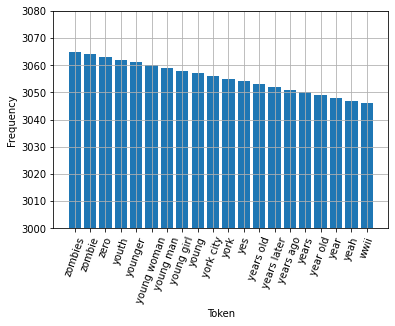

In [39]:
# 단어 빈도 분석
wordInfo = dict()

res = sorted(cnt_vect.vocabulary_.items(), reverse=True)[:20]
print(res)
for key, v in res: 
    if (len(str(key)) > 1):
      wordInfo[key] = v

plt.xlabel('Token')
plt.ylabel('Frequency')
plt.grid(True)
    
Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
plt.bar(range(len(wordInfo)), wordInfo.values(), align='center')
plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')
plt.ylim(ymin=3000, ymax=3080)
plt.show()

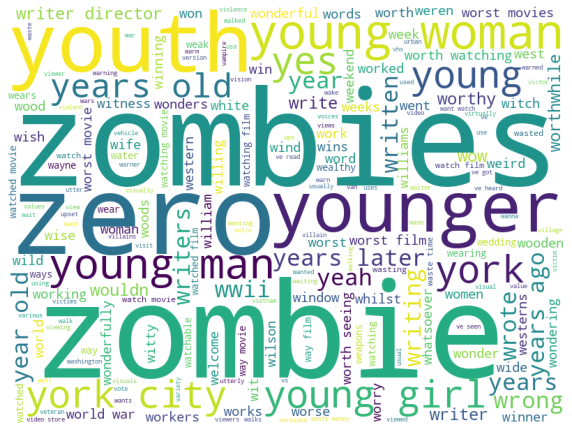

In [40]:
# 워드클라우드 시각화
from wordcloud import WordCloud

wc = WordCloud(width=800, height=600, background_color = "white")
wc = wc.generate_from_frequencies(dict(cnt_vect.vocabulary_.items()))
fig = plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis("off")
plt.show()